In [3]:
from ast import literal_eval
import pandas as pd

# Load and preprocess dataset
df = pd.read_pickle('../Daten/FINAL_faro_cleaned_embeddings_balanced.pkl')#.sample(10000)   

# Convert stringified lists to actual lists
if type(df['Categories'][0])!=list:
    print('Convert Categories to list ...')
    df['Categories'] = df['Categories'].apply(literal_eval)  

if type(df['web_embeddings'][0])!=list:
    print('Convert Embeddings to list ...')
    df['web_embeddings'] = df['web_embeddings'].apply(literal_eval)     
    

# Feature list
X = df['web_embeddings'].tolist() 
# Label list 
y = df['Categories'].tolist()  

Convert Embeddings to list ...


In [36]:
df_faro_sample = pd.read_pickle('../Daten/FINAL_faro_cleaned_embeddings_full.pkl')

# Convert stringified lists to actual lists
if type(df_faro_sample['Categories'][0])!=list:
    print('Convert Categories to list ...')
    df_faro_sample['Categories'] = df_faro_sample['Categories'].apply(literal_eval)  

if type(df_faro_sample['web_embeddings'][0])!=list:
    print('Convert Embeddings to list ...')
    df_faro_sample['web_embeddings'] = df_faro_sample['web_embeddings'].apply(literal_eval)   

In [52]:
df_faro_example_1 = df_faro_sample[df_faro_sample['Program-WebCmsId']=='89AE2D6E-4D40-4C53-8450-2BA6B7358211']

In [53]:
df_faro_example_2 = df_faro_sample[df_faro_sample['Web-Text'].str.contains('Fliegerbombe')]

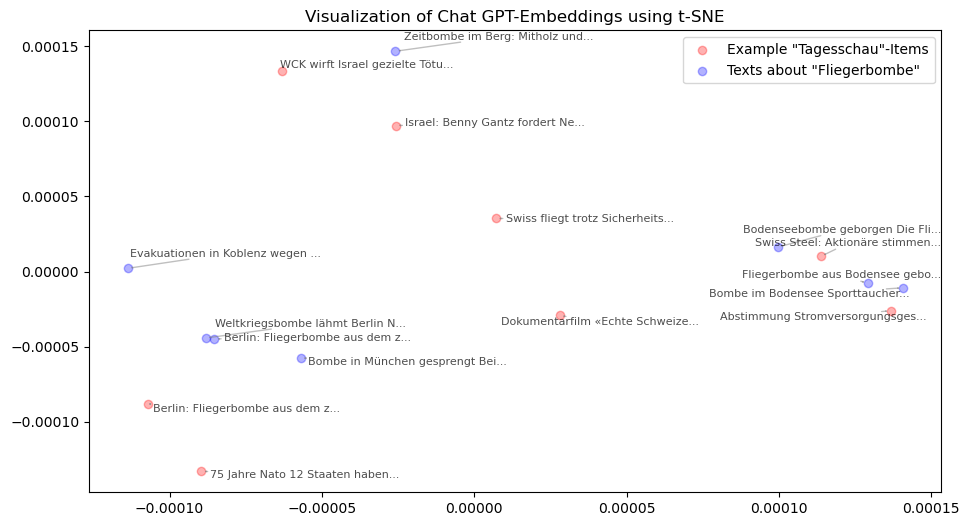

In [113]:
from adjustText import adjust_text


# Convert embeddings to numpy arrays
matrix1 = np.array(df_faro_example_1['web_embeddings'].tolist())
matrix2 = np.array(df_faro_example_2['web_embeddings'].tolist())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=4, random_state=42, init='pca', learning_rate=0.00001)
vis_dims1 = tsne.fit_transform(matrix1)
vis_dims2 = tsne.fit_transform(matrix2)

# Extract x and y coordinates
x1 = vis_dims1[:, 0]
y1 = vis_dims1[:, 1]

x2 = vis_dims2[:, 0]
y2 = vis_dims2[:, 1]



# Create the scatter plot
plt.figure(figsize=(11, 6))
plt.scatter(x1, y1, c='red', alpha=0.3, label='Example "Tagesschau"-Items')
plt.scatter(x2, y2, c='blue', alpha=0.3, label='Texts about "Fliegerbombe"')

# Annotate points with text from DataFrame and collect the texts for adjustText
texts = []
for i, txt in enumerate(df_faro_example_1['Web-Text']):
    texts.append(plt.text(x1[i], y1[i], f'{txt[0:30]}...', fontsize=8, alpha=0.7))
    
for i, txt in enumerate(df_faro_example_2['Web-Text']):
    texts.append(plt.text(x2[i], y2[i], f'{txt[0:30]}...', fontsize=8, alpha=0.7))

# Use adjustText to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', alpha=0.5))

# Add title and legend
plt.title("Visualization of Chat GPT-Embeddings using t-SNE")
plt.legend()
plt.show()